In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df.duplicated().any()

np.False_

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [7]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# **Data Analysis**

1. get the proportion gender based user count

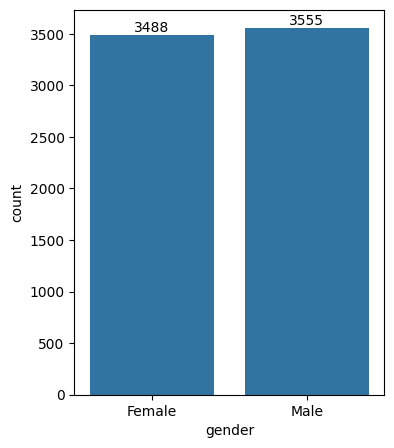

In [8]:
plt.figure(figsize=(4,5))
c=sns.countplot(df,x='gender')
c.bar_label(c.containers[0])
plt.show()

* the male gender user are more as compared to the female

1. how many percentage of users are churned

In [9]:
w2=df['Churn'].value_counts()
w2

Churn
No     5174
Yes    1869
Name: count, dtype: int64

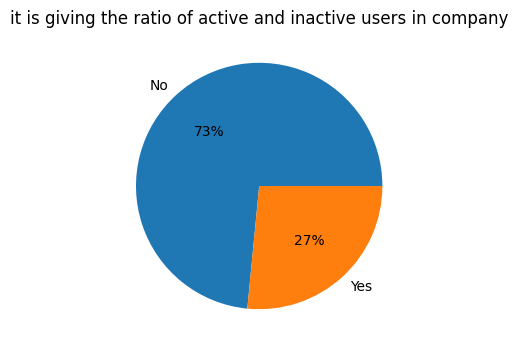

In [10]:
plt.figure(figsize=(5,4))
c=plt.pie(x=w2.values,labels=w2.index,autopct='%.0f%%')
plt.title('it is giving the ratio of active and inactive users in company')
plt.show()

* 27% have left the company serives and the 73% of users are still actively using company services
* also the customers are using this company rate is high 

* are their still the senior citizen using the company serives or not

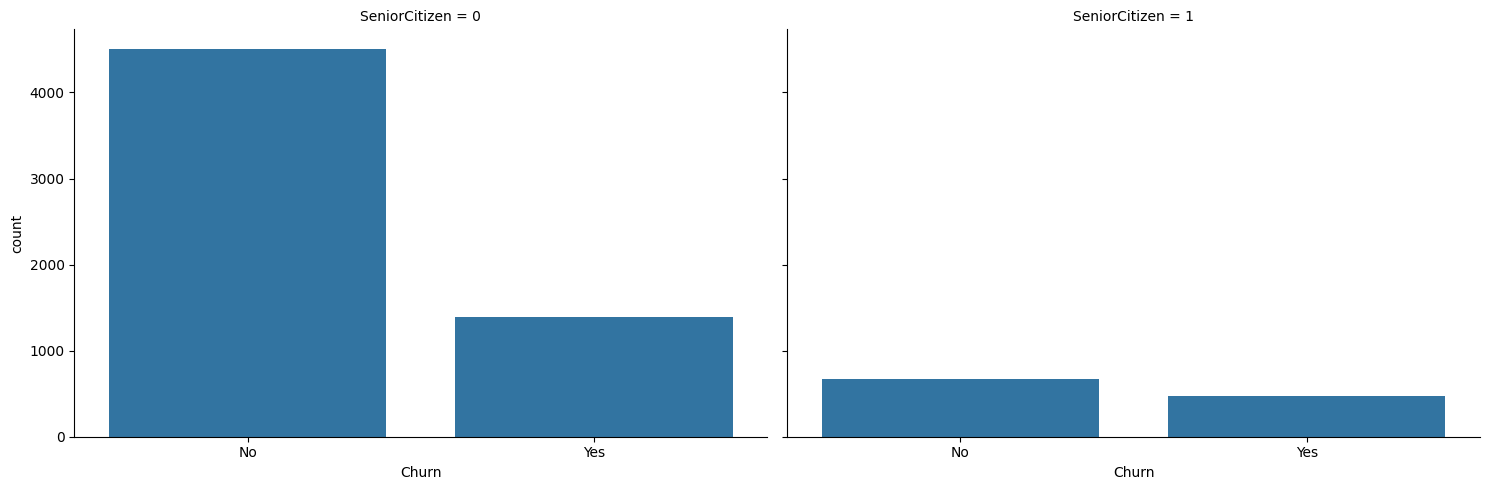

In [11]:
fg=sns.FacetGrid(df,col='SeniorCitizen',height=5,aspect=1.5)
c=fg.map_dataframe(sns.countplot,x='Churn')
plt.show()

* in the valid (living) senior citizen users are more using the company service 
* the expired users are using the company service ( that are  not valid infor)

q. how many gender based users are leaing the comapmny service

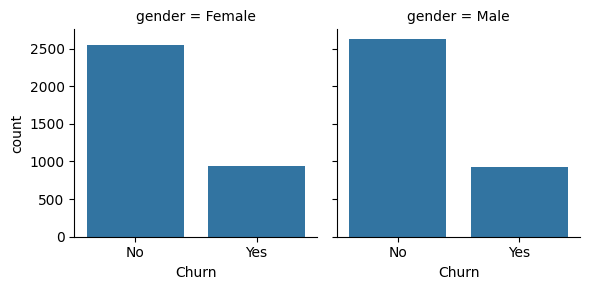

In [12]:
fg=sns.FacetGrid(df,col='gender')
fg.map_dataframe(sns.countplot,x='Churn',label='gender based users in company')
plt.show()

* male users are more as compared to the female users

q. how many tenure has more completed in company


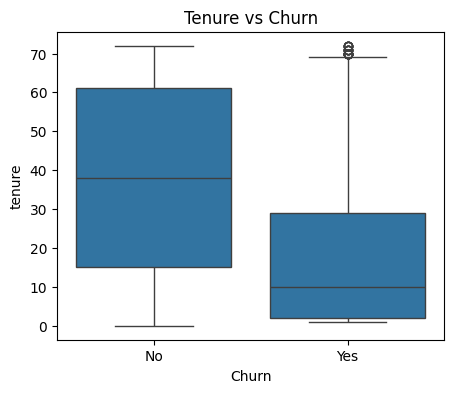

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(df,x='Churn',y='tenure')
plt.title('Tenure vs Churn')
plt.show()

**obt**= 
* from this graph we get to know that the tenure of the active users is in between 16 To 61 Tenure has completed
* From the graph we get to know that the average Is 39

* The user who have left the company they have completed their tenure in between 0 to 28, Some members of the users of company who have left after the tenure after 70+ years
* The average who have left the company after completing their 10th tenure They have left the company

C:\Users\Asus\AppData\Local\Temp\ipykernel_11308\2982846212.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'No':0,'Yes':1})


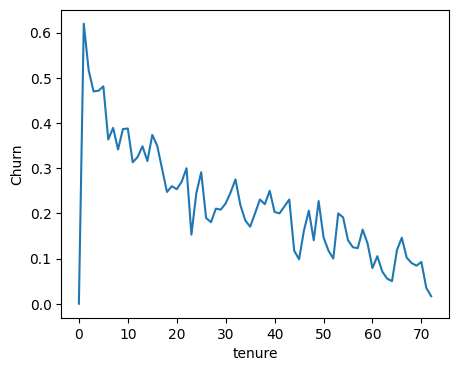

In [14]:
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})
churn_rate = df.groupby('tenure')['Churn'].mean().reset_index()

plt.figure(figsize=(5,4))
sns.lineplot(churn_rate,x='tenure',y='Churn')
plt.show()


**obt**=
* Customers are most likely to leave in the first few months, and the longer they stay, the less likely they are to churn
* As tenure increases, churn steadily goes down
* then if company tries hard to retaint the starting customers then the users tenure will be the highest

* Check whether our customer base is financially strong or noth

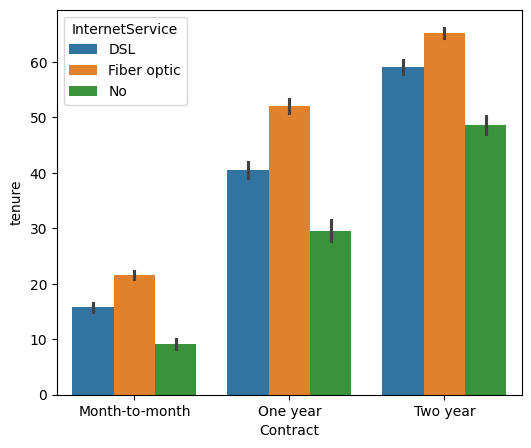

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(df,x='Contract',hue='InternetService',y='tenure',estimator='mean')
plt.show()

**obt**=
* From the graph we get to know that our customer base is taking majorly two years plan So we can see that our customer base is much more financially strong.
* And though majorly from the graph the tenure of two year plans are customer base are more active as compared to other year contracts/
* On the other hand we can see that the one year contract and 2 year contract the one year contract is also pretty much good tenure basis and they have also good customer financially strong but if we see the month to month plan they are little bit leaving the company and not continuing with the company and also they are not that much financially strong they are trying our service and then leaving

He is our customer base family friendly(Partner,Dependents) or not and does they have highly tenurely active & which contract they have choosen

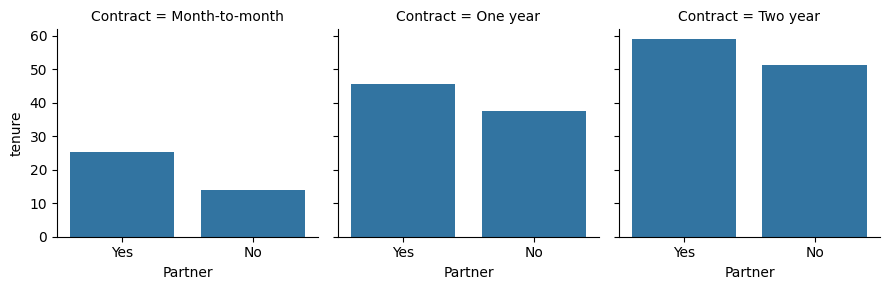

In [16]:
fg=sns.FacetGrid(df,col='Contract')
c=fg.map_dataframe(sns.barplot,x='Partner',y='tenure',estimator='mean',errorbar=None)

plt.show()

**obt**=
* From the graph we get to know that the month to month have more partner based customer and also in one and also In two year
* On the other hand if we the without Partner or we can say spouse their customer base is also strong
* *overall* If we see overall then the married or partnered once are more ads compared to the single ones but in the two year and one year there are also singles are also having a strong customer base but less the part

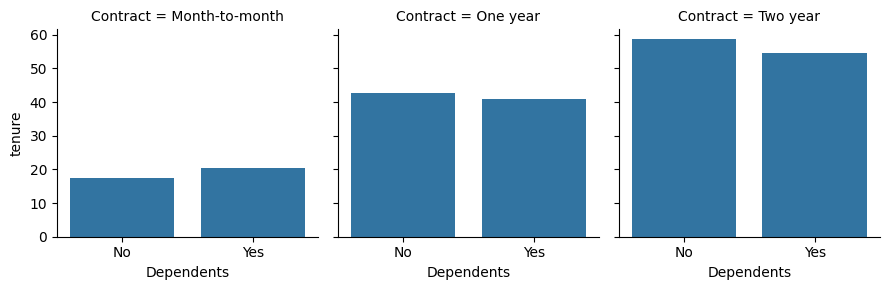

In [17]:
fg=sns.FacetGrid(df,col='Contract')
c=fg.map_dataframe(sns.barplot,x='Dependents',y='tenure',estimator='mean',errorbar=None)

plt.show()

**obt**=
* From the graph we get to know that the customer base of the family dependent members are there like children's parents and On the other hand non dependent ones who doesn't have family both are having equal customer base

q. How much does the total charges is given by  Each gender check the average and Total

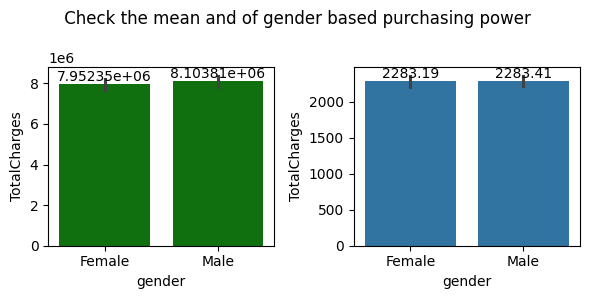

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(6,3))

c=sns.barplot(df,x='gender',y='TotalCharges',estimator='sum',ax=axes[0],color='green')
c.bar_label(c.containers[0])
v=sns.barplot(df,x='gender',y='TotalCharges',estimator='mean',ax=axes[1])
v.bar_label(v.containers[0])

plt.suptitle(' Check the mean and of gender based purchasing power')

plt.tight_layout()
plt.show()

**obt**=
* From the graph if we see the general base avg  purchasing power is male is higher as compared to the female
* From the second see the sum of total spending on the purchasing subscription same for both male and female

q. Check whether the customers are leaving because of the pricing

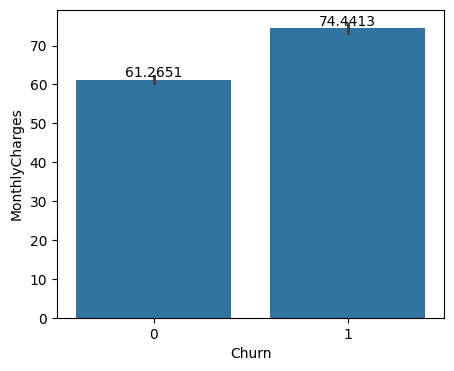

In [19]:
plt.figure(figsize=(5,4))
c=sns.barplot(df,x='Churn',y='MonthlyCharges',estimator='mean')
c.bar_label(c.containers[0])
plt.show()

**obt**=
* If we see the graph then we get to know that those customers who are active they are been getting less charge as compared to those who are leaving the company they are getting more charge 
* From this if you want to keep the customers for the long term we should plan some of the purchasing offers for the customer so that they can rely on them and get the benefits of them and they can be holding the company membership for a longer period of time so we can do that kind of schemes

q. Is there Churn rate increasing because of the Internet connection check that 

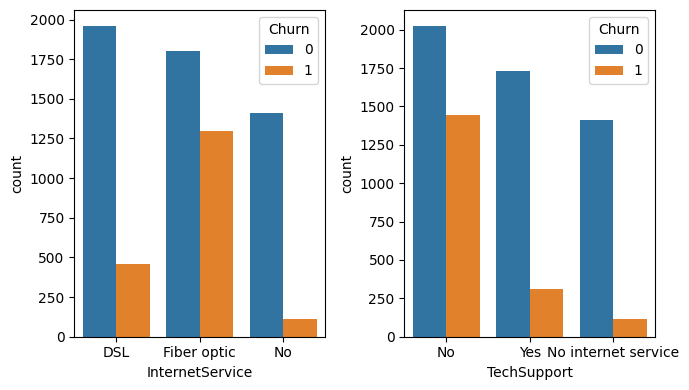

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(7,4))

sns.countplot(df,x='InternetService',hue='Churn',ax=axes[0])
sns.countplot(df,x='TechSupport',hue='Churn',ax=axes[1])

#axes[0].set_ylabel('sum os fare')
#
# axes[1].set_ylabel('avg of fare')

plt.tight_layout() 
plt.show()

**obt**=
* Based on the operation we can see that the optic fiber customers are leaving the company services as compared to the DSL and no in such case we can see that the optic fiber service is not much good so on that basis that we can predict that customers are not satisfied with the Internet service so they are leaving the company
* From the tech support the no category people where they are not getting the tech support getting into company and also leaving the company at same rate a bit difference is there as compared to the yes but the customers in the know they are getting frustrated by the services so they are leaving the company rapidly

# **conclusion**=
If we see on the basis on the graphs and all the reading of analysis we get to know that the customers are coming rapidly into company and leaving the company in a shorter tenure it is because of some of the plants and their contracts and lack of Technical Support and Internet support So to improve our customer base we have to work on the long term plans and give them a good tech support So on that basis the customers are leaving the company